In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import cv2
import os
import h5py

In [2]:
# Change working directories
#Data location
directory = Path('/Users/apate/OneDrive - Northeastern University/Dennis Lab site/Image processing/IR VIVO data/AMD/240329_Water_immersed')
#Path to save data
workingPath = Path('/Users/apate/OneDrive - Northeastern University/Dennis Lab site/BU Research Drive Data/Amish/Imaging and Processing/Coding/240530_AP_HDR')
here = Path(workingPath).resolve().parent
os.chdir(here)
os.chmod(here, 0o755)

#Experiment title
experiment_title = 'Water_immersed'

In [3]:
#Define wavelength and filter names
laser_wavelengths = {'1': '670', '2': '760', '3': '808'}
emission_filters = {'12': 'BP1150', '13': 'BP1200', '14': 'BP1250', '15': 'BP1300', '16': 'BP1350', '17': 'BP1575'}

# Get the list of darkcount files
darkcount_files = [f for f in os.listdir(directory) if f.startswith('darkcounts')]
darkcount_files.sort(key=lambda x: float(x[10:-3]))

# Initialize a dictionary to store the image file lists
image_files = {}

# Get the list of image files for each parameter combination
for laser_key, laser_value in laser_wavelengths.items():
    for filter_key, filter_value in emission_filters.items():
        key = f"{experiment_title}_{laser_value}_{filter_value}"
        image_files[key] = [f for f in os.listdir(directory) if f.startswith(f"{experiment_title}_{laser_key}_{filter_key}")]
        image_files[key].sort(key=lambda x: float(x.split('_')[-1][:-3]))

# Read the darkcount files and store the data
darkcount_data = []
exposure_times = []
for file in darkcount_files:
    file_path = os.path.join(directory, file)
    with h5py.File(file_path, 'r') as h5f:
        darkcount = h5f['Cube']['Images'][()]
        exposure_time = h5f['Cube']['TimeExposure'][()].item()
        darkcount_data.append(darkcount)
        exposure_times.append(exposure_time)

# Concatenate the darkcount data into an array with dimensions (num_exposure_times, height, width)
darkcount_array = np.squeeze(np.array(darkcount_data))

# Convert exposure_times to a NumPy array
exposure_times = np.squeeze(np.array(exposure_times))

# Read the image files and store the data for each parameter combination
image_arrays = {}
for key, files in image_files.items():
    image_data = []
    for file in files:
        file_path = os.path.join(directory, file)
        with h5py.File(file_path, 'r') as h5f:
            image = h5f['Cube']['Images'][()]
            image_data.append(image)
    image_arrays[key] = np.squeeze(np.array(image_data))

# Calculate the mean and standard deviation of pixel intensities for each exposure time in the darkcount cube
darkcount_mean = np.mean(darkcount_array[:, :, :], axis=(1, 2))
darkcount_std = np.std(darkcount_array[:, :, :], axis=(1, 2))
print(darkcount_mean)
print(darkcount_std)

# Convert the image arrays to NumPy arrays for further processing
for key in image_arrays.keys():
    image_arrays[key] = np.array(image_arrays[key])

# Print the shapes of the arrays
print("Darkcount array shape:", darkcount_array.shape)
print("Exposure times array shape:", exposure_times.shape)
print(exposure_times)
for key in image_arrays.keys():
    print(f"Image array shape for {key}:", image_arrays[key].shape)

[ 799.21032715  964.28184509 1061.37977295 1094.0200592  1105.97271118
 1123.6138031  1137.19124756 1152.92250977 1169.57583618 1184.83742676
 1205.35088806 1236.3617218  1280.04559631 1353.41764221 1498.27137451]
[12.86297416 13.12020853 13.37192913 13.52632673 13.71151908 13.73150302
 13.7205852  13.56561546 13.3067028  13.20703569 13.33763676 13.98644368
 15.13072328 16.61922603 18.79814508]
Darkcount array shape: (15, 640, 512)
Exposure times array shape: (15,)
[1.0000e-04 2.0000e-04 4.0000e-04 8.0000e-04 1.6000e-03 3.2000e-03
 6.4000e-03 1.2800e-02 2.5600e-02 5.1200e-02 1.0240e-01 2.0480e-01
 4.0960e-01 8.1920e-01 1.6384e+00]
Image array shape for Water_immersed_670_BP1150: (15, 640, 512)
Image array shape for Water_immersed_670_BP1200: (15, 640, 512)
Image array shape for Water_immersed_670_BP1250: (15, 640, 512)
Image array shape for Water_immersed_670_BP1300: (15, 640, 512)
Image array shape for Water_immersed_670_BP1350: (15, 640, 512)
Image array shape for Water_immersed_670_

dict_keys(['Water_immersed_670_BP1150', 'Water_immersed_670_BP1200', 'Water_immersed_670_BP1250', 'Water_immersed_670_BP1300', 'Water_immersed_670_BP1350', 'Water_immersed_670_BP1575', 'Water_immersed_760_BP1150', 'Water_immersed_760_BP1200', 'Water_immersed_760_BP1250', 'Water_immersed_760_BP1300', 'Water_immersed_760_BP1350', 'Water_immersed_760_BP1575', 'Water_immersed_808_BP1150', 'Water_immersed_808_BP1200', 'Water_immersed_808_BP1250', 'Water_immersed_808_BP1300', 'Water_immersed_808_BP1350', 'Water_immersed_808_BP1575'])


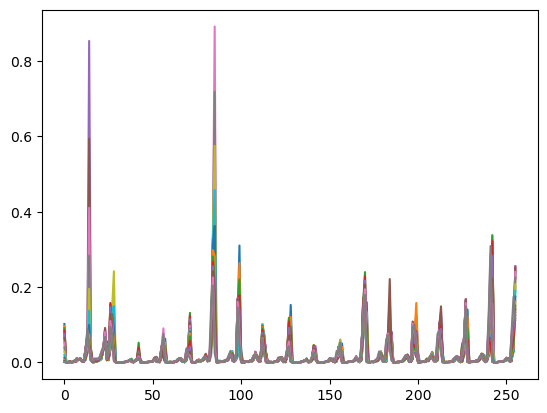

In [33]:
#For each imaging condition, generate an HDR image

#for key in image_arrays.keys():
#    image_data = image_arrays[key].astype(np.uint8)
    #Align images between exposures by converting to median threshold bitmaps

#    alignMTB = cv2.createAlignMTB()
#    alignMTB.process(image_data, exposure_times)

#Define camera response function
responseDebevec = np.array([])
for key in image_arrays.keys():
    images = image_arrays[key].astype(np.uint8)

    #greyimage = []
    #for image in images:
    #    print( image.shape)
    #    image = image.astype(np.uint16)#cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #    greyimage.append(image)
    #cv2.imshow('image', image)

    calibrateDebevec = cv2.createCalibrateDebevec()
    responseDebevec = np.append(responseDebevec, calibrateDebevec.process(images,exposure_times.astype(np.float32)))
print (image_arrays.keys())
responseDebevec = np.reshape(responseDebevec, [256,len(image_arrays.keys())])
#Plot camera response function

c = 0
for key in image_arrays.keys():
    plt.plot(np.arange(256), responseDebevec[:,c]/256)
    c = c+1
    



In [31]:
#Merge images with image fusion

HDRimages = {}
c=0
for key in image_arrays.keys():
    images = image_arrays[key].astype(np.uint8)
    print(images[0,:,:])
    merge_debevec = cv2.createMergeDebevec() #creates a MergeDebevec object
    hdr_debevec = merge_debevec.process(images, exposure_times.astype(np.float32), responseDebevec[:,c]) #Process this object with darkcount_array, exposure_times, and image_arrays
    hdr_debevec = np.clip(hdr_debevec, 0, 1)  #limit values of hdr_debevec to be between 0 and 1

    #Display images
    plt.imshow(hdr_debevec)
    HDRimages = np.append(HDRimages, hdr_debevec)
    c = c+1



[[30 11 37 ... 29 51 44]
 [19 48 31 ... 35 50 26]
 [33 23 34 ... 36 57 34]
 ...
 [36 51 30 ... 19 18 33]
 [59 52 44 ... 29  9 23]
 [66 78 58 ... 31 19 23]]


error: OpenCV(4.9.0) D:\bld\libopencv_1716156177264\work\modules\core\src\arithm.cpp:674: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'cv::arithm_op'


In [ ]:
#Tonemapping
tonemap = cv2.createTonemapDurand(1.5,4,1.0,1,1)
ldr_debevec = tonemap.process(hdr_debevec)

#Display tonemapped images
plt.imshow(ldr_debevec)
plt.show()

#Save
cv2.imwrite(f"{experiment_title}.png", ldr_debevec*255)